Análisis Exploratorio de Datos (EDA)
Creado por Hector vejar casillas

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

carga de datos

In [5]:
#https://www.kaggle.com/datasets/asinow/car-price-dataset
carDataset = pd.read_csv('./car_price_dataset.csv')
carDataset.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [ ]:
En esta parte solo me quiero asegurar de que no existan valores nulos o valores repetidos en las  columnas categoricas

In [47]:
print(carDataset.isnull().sum())
print('Marca:')
print(carDataset['Brand'].unique())
print('Modelo:')
print(carDataset['Model'].unique())
print('Tipo de conbustible:')
print(carDataset['Fuel_Type'].unique())
print('Trasmision:')
print(carDataset['Transmission'].unique())

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64
Marca:
['Kia' 'Chevrolet' 'Mercedes' 'Audi' 'Volkswagen' 'Toyota' 'Honda' 'BMW'
 'Hyundai' 'Ford']
Modelo:
['Rio' 'Malibu' 'GLA' 'Q5' 'Golf' 'Camry' 'Civic' 'Sportage' 'RAV4'
 '5 Series' 'CR-V' 'Elantra' 'Tiguan' 'Equinox' 'Explorer' 'A3' '3 Series'
 'Tucson' 'Passat' 'Impala' 'Corolla' 'Optima' 'Fiesta' 'A4' 'Focus'
 'E-Class' 'Sonata' 'C-Class' 'X5' 'Accord']
Tipo de conbustible:
['Diesel' 'Hybrid' 'Electric' 'Petrol']
Trasmision:
['Manual' 'Automatic' 'Semi-Automatic']


Exploracion del dataset

In [7]:
carDataset.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


Histograma para ver la distribucion de los valosres continuos

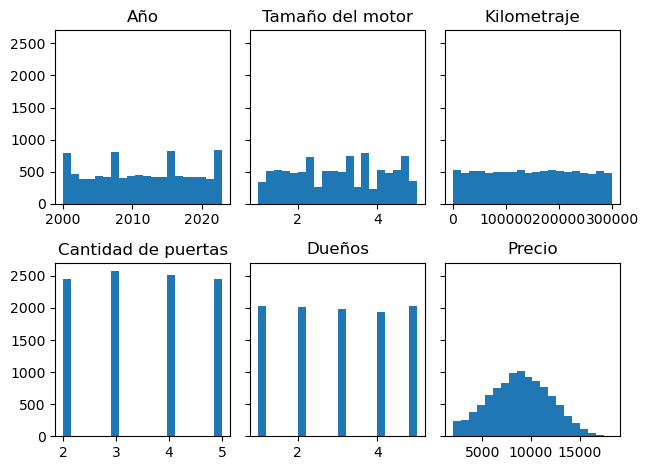

In [71]:
fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True)
axs[0][0].hist(carDataset['Year'], bins=20)
axs[0, 0].set_title('Año')
axs[0][1].hist(carDataset['Engine_Size'], bins=20)
axs[0, 1].set_title('Tamaño del motor')
axs[0][2].hist(carDataset['Mileage'], bins=20)
axs[0, 2].set_title('Kilometraje')
axs[1][0].hist(carDataset['Doors'], bins=20)
axs[1, 0].set_title('Cantidad de puertas')
axs[1][1].hist(carDataset['Owner_Count'], bins=20)
axs[1, 1].set_title('Dueños')
axs[1][2].hist(carDataset['Price'], bins=20)
axs[1, 2].set_title('Precio')
plt.show()

la distribucion parece ser lo esperado no veo nada especialmente llamativo

Box plot para identificar valores atipicos

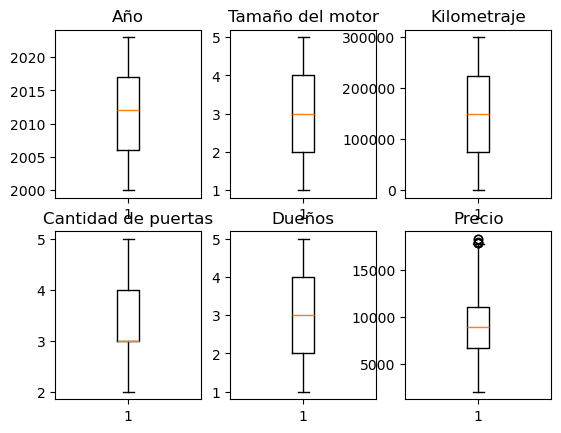

In [35]:
# Box plot
fig, axs = plt.subplots(2,3)
#año
axs[0, 0].boxplot(carDataset['Year'])
axs[0, 0].set_title('Año')
#Tamaño del motor
axs[0, 1].boxplot(carDataset['Engine_Size'])
axs[0, 1].set_title('Tamaño del motor')
#Kilometraje
axs[0, 2].boxplot(carDataset['Mileage'])
axs[0, 2].set_title('Kilometraje')
#Cantidad de puertas
axs[1, 0].boxplot(carDataset['Doors'])
axs[1, 0].set_title('Cantidad de puertas')
#Dueños
axs[1, 1].boxplot(carDataset['Owner_Count'])
axs[1, 1].set_title('Dueños')
#Precio
axs[1, 2].boxplot(carDataset['Price'])
axs[1, 2].set_title('Precio')
plt.show()

Podemos ver valores atipicos en el precio

Analisis multi variable Scatter Plot

C:\Users\asfre\AppData\Local\Temp\ipykernel_18800\2269230748.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x[col], y, s=10, alpha=0.5, c='black', cmap='viridis')


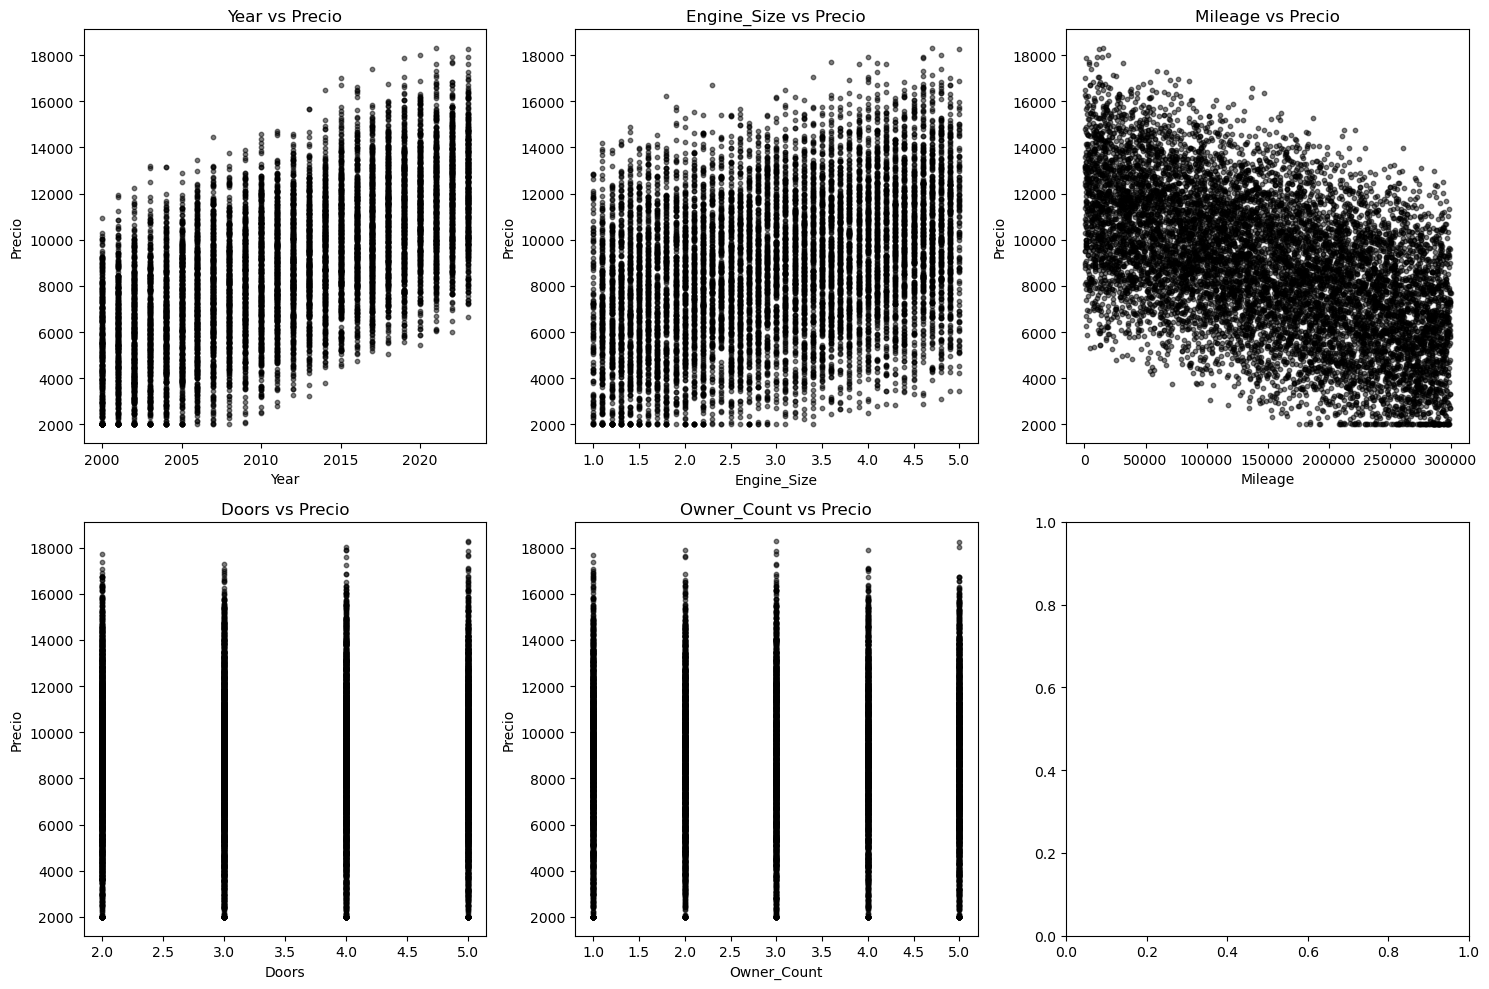

In [107]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

x = carDataset[['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count']]
y = carDataset['Price']
columns = x.columns

# Crear gráficos de dispersión para cada variable de x contra y
for i, col in enumerate(columns):
    ax = axs[i//3, i%3]  # Distribuir en una cuadrícula de 2x3
    ax.scatter(x[col], y, s=10, alpha=0.5, c='black', cmap='viridis')
    ax.set_xlabel(col)
    ax.set_ylabel('Precio')
    ax.set_title(f'{col} vs Precio')

plt.tight_layout()
plt.show()

Parece que el precio tiene una relacion con el año,el tamaño del motor y el kilometraje.

Aun  que veo relaciones claras entre varias variables en el dataset quiero hacer una matris de correlacion.

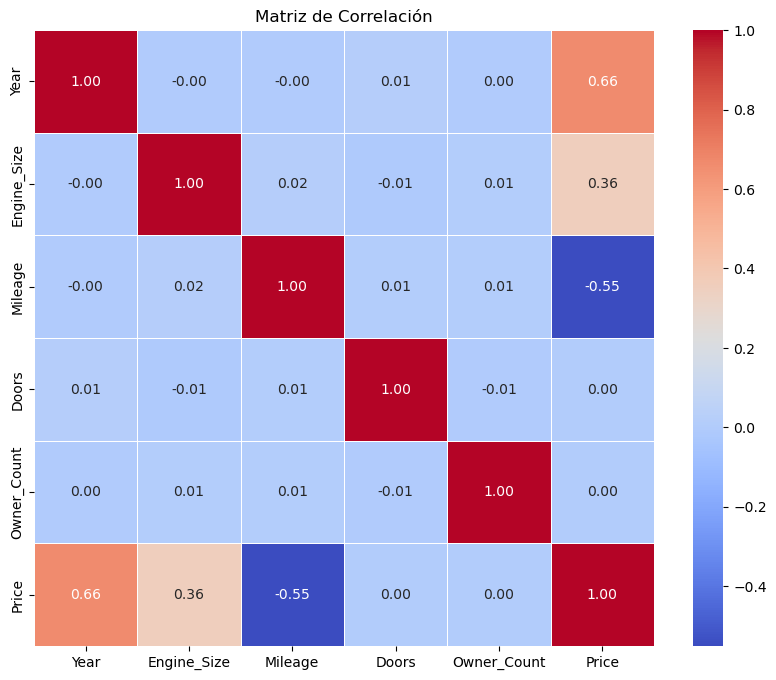

In [112]:
correlation_matrix = carDataset[['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price']].corr()

# Crear un heatmap (mapa de calor) para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Ahora podemos ver correlaciones mas claras entre variables por ejemplo entre mas años tenga el automovil mas baja el precio del mismo lo cual tiene sentido.